# Dampe calorimeter regression task

In this project you will be looking at image like data from particle hits in a calorimeter. The goal of the project is to predict the location of the particle in the sky, using the data recorded by the calorimeter.

In [1]:
from utils import get_input_data
calorimeter_images, calorimeter_data, data_target, data_rec = get_input_data()

In [2]:
n_samples, height, width, channels = calorimeter_images.shape
print(f'There are {n_samples} images, each image is {height} pixels by {width} pixels with {channels} channels.')
print(f'The data is of type {calorimeter_images.dtype}')
print(f'The max data entry is {calorimeter_images.max()} the minimum data entry is {calorimeter_images.min()}.')

There are 141946 images, each image is 14 pixels by 22 pixels with 1 channels.
The data is of type float32
The max data entry is 255.0 the minimum data entry is 0.0.


In [3]:
calorimeter_images[0].shape

(14, 22, 1)

Lets look at some images from the calorimeter.

Matplotlib is building the font cache; this may take a moment.


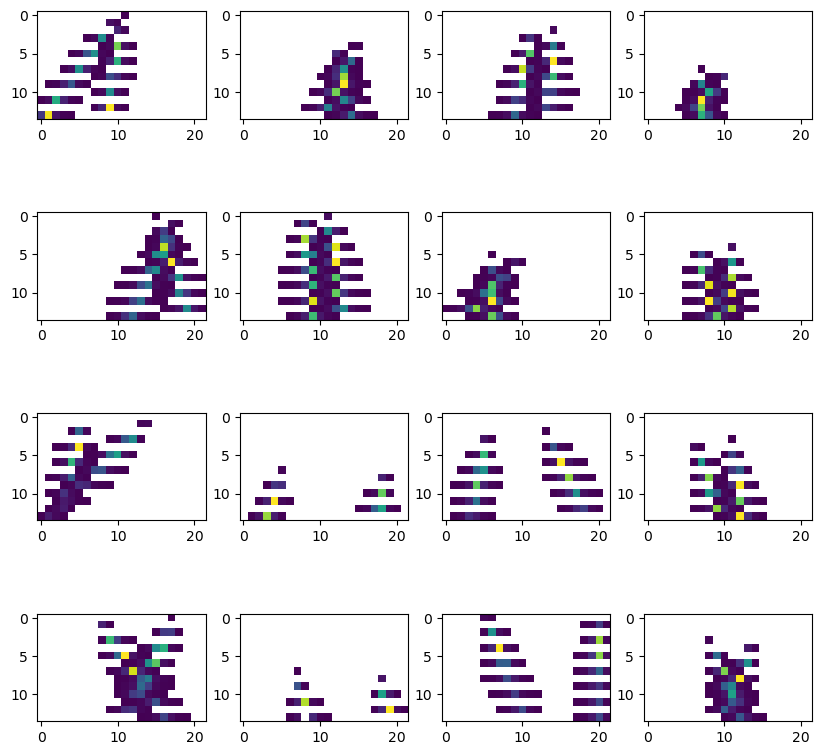

In [4]:
import matplotlib.pyplot as plt
n_c = 4
n_r = 4
fig, ax = plt.subplots(n_c, n_r, figsize=(10, 10))
for i, ax in enumerate(fig.axes):
    # Here we make a copy so we can manipulate the array without changing it in calorimeter_images
    image = calorimeter_images[i].copy()
    # Filling the zero values with NaNs will show us white space where there is zero deposits recorded.
    # Note that if we didn't have the copy there, this would insert NaNs into calorimeter_images.
    image[image == 0] = 'nan'
    ax.imshow(image)
plt.show()

These images show the energy deposits from incoming particles. The next thing we can look at is additional information from the calorimeter. The extra information is given by the total energy measured in the hit (first column) and the energy of maximum bar in the calorimeter.

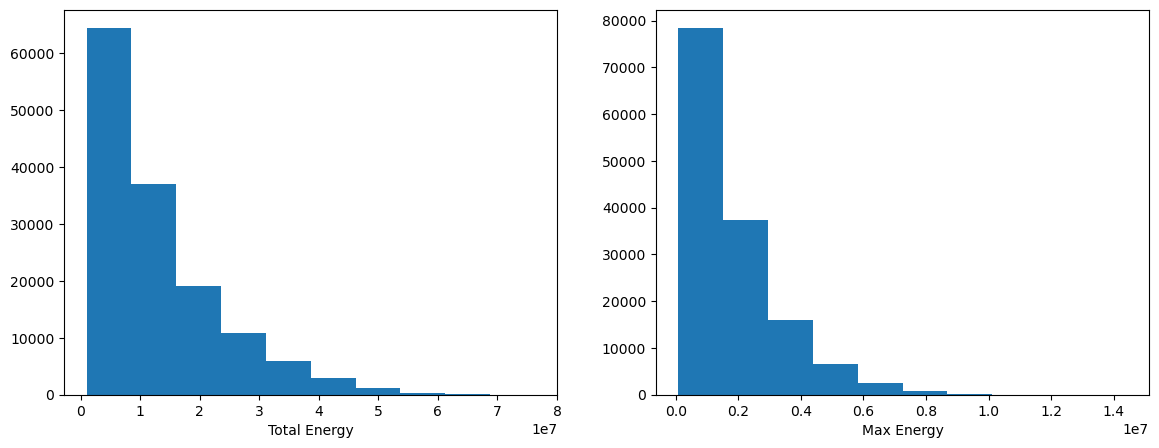

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].hist(calorimeter_data[:, 0])
ax[0].set_xlabel('Total Energy')
ax[1].hist(calorimeter_data[:, 1])
ax[1].set_xlabel('Max Energy')
plt.show()

Using these variables and the image, your goal is to predict the truth x and y coordinates of the incident particle. We can visualise this data in several different ways.

The most straightforward is to look at each example individually. Here we can see that each hit is very different from the others.

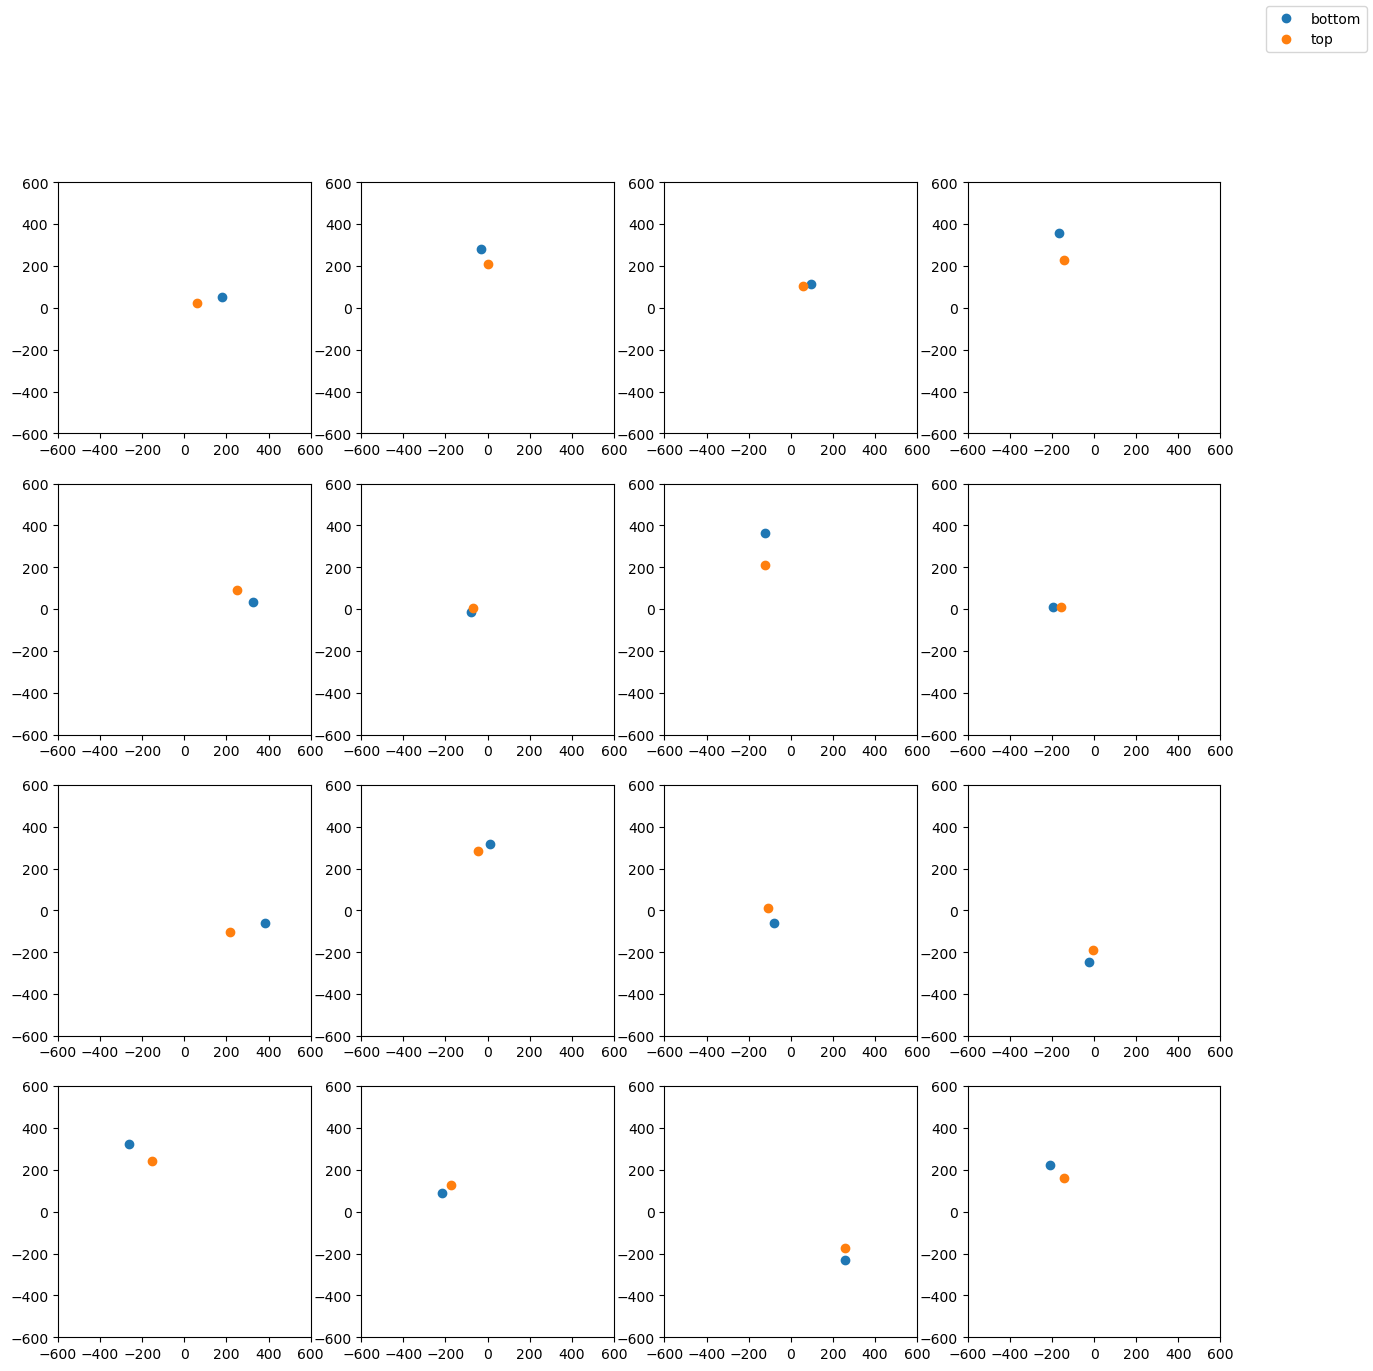

In [6]:
n_c = 4
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(15, 15))
for i, ax in enumerate(fig.axes):
    x_bot, x_top, y_bot, y_top = data_target[i]
    ax.plot(x_bot, y_bot, 'o', label='bottom')
    ax.plot(x_top, y_top, 'o', label='top')
    ax.set_xlim(-600,600)
    ax.set_ylim(-600,600)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

It's also important to look at the distributions over each of these features individually.

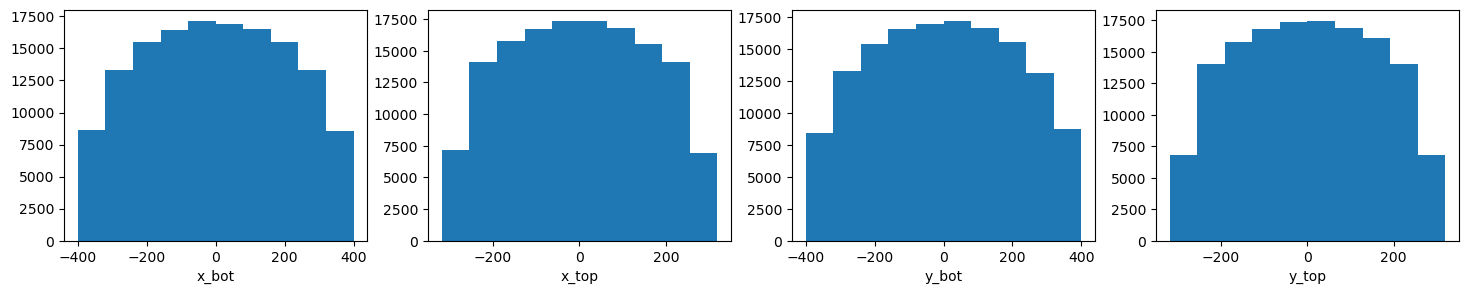

In [7]:
n_c = 1
n_r = 4
fig, axes = plt.subplots(n_c, n_r, figsize=(18, 3))
names = ['x_bot', 'x_top', 'y_bot', 'y_top']
for i, ax in enumerate(fig.axes):
    ax.hist(data_target[:, i])
    ax.set_xlabel(names[i])
plt.show()

We can also look at how the data is distributed as a whole, to see if there are any regions that are left out.

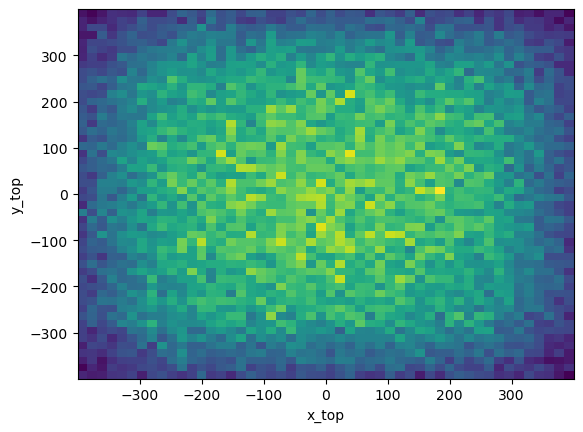

In [8]:
plt.hist2d(data_target[:, 0], data_target[:, 2], bins=50)
plt.xlabel('x_top')
plt.ylabel('y_top')
plt.show()

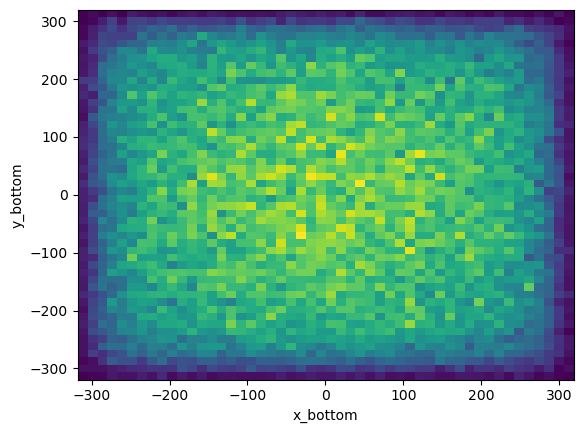

In [9]:
plt.hist2d(data_target[:, 1], data_target[:, 3], bins=50)
plt.xlabel('x_bottom')
plt.ylabel('y_bottom')
plt.show()

The target distribution is quite tricky to visualise, and you should try to come up with your own ways of visualising it. How are the angles between hits distributed? How are the magnitudes of the vectors distributed? Will there be problems with predicting these values? Will any of these distributions lead to biases? 

These are the kinds of questions you might want to address.